In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')  # Replace with your actual file path

In [ ]:
# Step 1: Check for null values in each column
null_counts = df.isnull().sum()
print("\nNull values in each column:\n")
print(null_counts)


Null values in each column:

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [ ]:
# Step 2: Print total number of rows with at least one null
total_null_rows = df.isnull().any(axis=1).sum()
print(f"\nTotal rows with at least one null value: {total_null_rows}")

# Step 3: Drop rows with any null values
df_cleaned = df.dropna()

# Step 4: Print new shape of the cleaned dataset
print(f"\nShape after dropping rows with null values: {df_cleaned.shape}")


Total rows with at least one null value: 53

Shape after dropping rows with null values: (568401, 10)


In [ ]:
#Check for duplicate values

# Drop completely duplicate rows
df_remove_duplicates = df_cleaned.drop_duplicates()

print(f"Shape after removing duplicates: {df_remove_duplicates.shape}")

Shape after removing duplicates: (568401, 10)


In [ ]:
# Count the number of reviews for each score
score_counts = df_remove_duplicates['Score'].value_counts().sort_index()

print("Number of reviews per score:\n")
print(score_counts)

Number of reviews per score:

Score
1     52264
2     29743
3     42638
4     80654
5    363102
Name: count, dtype: int64


In [ ]:
#Drop the columns

final_df = df_remove_duplicates.drop(columns=[
    'Id', 'ProductId', 'UserId', 'ProfileName',
    'HelpfulnessNumerator', 'HelpfulnessDenominator',
    'Time'
])

In [ ]:
print(final_df.shape)
print(final_df)

(568401, 3)
        Score                             Summary  \
0           5               Good Quality Dog Food   
1           1                   Not as Advertised   
2           4               "Delight" says it all   
3           2                      Cough Medicine   
4           5                         Great taffy   
...       ...                                 ...   
568449      5                 Will not do without   
568450      2                        disappointed   
568451      5            Perfect for our maltipoo   
568452      5  Favorite Training and reward treat   
568453      5                         Great Honey   

                                                     Text  
0       I have bought several of the Vitality canned d...  
1       Product arrived labeled as Jumbo Salted Peanut...  
2       This is a confection that has been around a fe...  
3       If you are looking for the secret ingredient i...  
4       Great taffy at a great price.  There was a 

In [ ]:
# Define mapping: 1-2 → 0 (Negative), 3 → 1 (Neutral), 4-5 → 2 (Positive)
def score_to_class(score):
    if score <= 2:
        return 0  # Negative
    elif score == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

# Apply the mapping and replace the 'Score' column
final_df['Score'] = final_df['Score'].apply(score_to_class)

# Optionally print value counts to confirm
print("Value counts for sentiment classes (0=Negative, 1=Neutral, 2=Positive):")
print(final_df['Score'].value_counts().sort_index())

Value counts for sentiment classes (0=Negative, 1=Neutral, 2=Positive):
Score
0     82007
1     42638
2    443756
Name: count, dtype: int64


In [ ]:
print(final_df)

        Score                             Summary  \
0           2               Good Quality Dog Food   
1           0                   Not as Advertised   
2           2               "Delight" says it all   
3           0                      Cough Medicine   
4           2                         Great taffy   
...       ...                                 ...   
568449      2                 Will not do without   
568450      0                        disappointed   
568451      2            Perfect for our maltipoo   
568452      2  Favorite Training and reward treat   
568453      2                         Great Honey   

                                                     Text  
0       I have bought several of the Vitality canned d...  
1       Product arrived labeled as Jumbo Salted Peanut...  
2       This is a confection that has been around a fe...  
3       If you are looking for the secret ingredient i...  
4       Great taffy at a great price.  There was a wid...  
...

In [ ]:
# Clean text
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['Summary'] = df['Summary'].apply(clean_text)  # Replace column name


In [ ]:
print(final_df)

        Score                             Summary  \
0           2               Good Quality Dog Food   
1           0                   Not as Advertised   
2           2               "Delight" says it all   
3           0                      Cough Medicine   
4           2                         Great taffy   
...       ...                                 ...   
568449      2                 Will not do without   
568450      0                        disappointed   
568451      2            Perfect for our maltipoo   
568452      2  Favorite Training and reward treat   
568453      2                         Great Honey   

                                                     Text  
0       I have bought several of the Vitality canned d...  
1       Product arrived labeled as Jumbo Salted Peanut...  
2       This is a confection that has been around a fe...  
3       If you are looking for the secret ingredient i...  
4       Great taffy at a great price.  There was a wid...  
...

In [ ]:
# Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])
df['Summary'] = df['Summary'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Summary'])


In [ ]:
print(final_df)

        Score                             Summary  \
0           2               Good Quality Dog Food   
1           0                   Not as Advertised   
2           2               "Delight" says it all   
3           0                      Cough Medicine   
4           2                         Great taffy   
...       ...                                 ...   
568449      2                 Will not do without   
568450      0                        disappointed   
568451      2            Perfect for our maltipoo   
568452      2  Favorite Training and reward treat   
568453      2                         Great Honey   

                                                     Text  
0       I have bought several of the Vitality canned d...  
1       Product arrived labeled as Jumbo Salted Peanut...  
2       This is a confection that has been around a fe...  
3       If you are looking for the secret ingredient i...  
4       Great taffy at a great price.  There was a wid...  
...

In [ ]:
final_df.to_csv("/content/drive/MyDrive/Preprocessed_svm.csv")

With unbalanced dataset

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Fill missing values
final_df['Summary'] = final_df['Summary'].fillna('')
final_df['Text'] = final_df['Text'].fillna('')

# Define inputs and target
X_summary = final_df['Summary']
X_text = final_df['Text']
y = final_df['Score']

# Stratified split (keeping both summary and text)
X_sum_train, X_sum_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_summary, X_text, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Rebuild train and test DataFrames
train_df = pd.DataFrame({
    'Summary': X_sum_train,
    'Text': X_text_train,
    'Score': y_train
})

test_df = pd.DataFrame({
    'Summary': X_sum_test,
    'Text': X_text_test,
    'Score': y_test
})

# Save to CSV
train_df.to_csv('/content/drive/MyDrive/train_unbalanced_svm_data.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/test_unbalanced_svm_data.csv', index=False)

# Print class distribution
print("Class distribution in training data:")
print(train_df['Score'].value_counts().sort_index())

print("\nClass distribution in test data:")
print(test_df['Score'].value_counts().sort_index())

Class distribution in training data:
Score
0     65606
1     34110
2    355004
Name: count, dtype: int64

Class distribution in test data:
Score
0    16401
1     8528
2    88752
Name: count, dtype: int64


With reduced majority class

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pandas as pd

# Load your main DataFrame (if not already in memory)
df = pd.read_csv('/content/drive/MyDrive/Preprocessed_svm.csv')  # Uncomment if needed

# Step 1: Separate the classes
df_0 = df[df['Score'] == 0]
df_1 = df[df['Score'] == 1]
df_2 = df[df['Score'] == 2]

# Step 2: Downsample class 2 (Positive) to 100,000 samples
df_2_downsampled = resample(df_2, replace=False, n_samples=100000, random_state=42)

# Step 3: Combine into new balanced DataFrame
df_reduced = pd.concat([df_0, df_1, df_2_downsampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# Step 4: Prepare features
X_summary = df_reduced['Summary'].fillna('')
X_text = df_reduced['Text'].fillna('')
y = df_reduced['Score']

# Step 5: Stratified train-test split
X_sum_train, X_sum_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_summary, X_text, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Step 6: Save train and test splits
train_df = pd.DataFrame({
    'Summary': X_sum_train,
    'Text': X_text_train,
    'Score': y_train
})

test_df = pd.DataFrame({
    'Summary': X_sum_test,
    'Text': X_text_test,
    'Score': y_test
})

train_df.to_csv('/content/drive/MyDrive/train_data_reduced_svm.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/test_data_reduced_svm.csv', index=False)

# Step 7: Print class distributions
print("Train class distribution (reduced):")
print(train_df['Score'].value_counts().sort_index())

print("\nTest class distribution (reduced):")
print(test_df['Score'].value_counts().sort_index())

Train class distribution (reduced):
Score
0    65606
1    34110
2    80000
Name: count, dtype: int64

Test class distribution (reduced):
Score
0    16401
1     8528
2    20000
Name: count, dtype: int64


Generate balanced dataset csv

In [ ]:
from sklearn.utils import resample
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Preprocessed_svm.csv')  # Uncomment if needed

# Step 1: Separate classes
df_0 = df[df['Score'] == 0]
df_1 = df[df['Score'] == 1]
df_2 = df[df['Score'] == 2]

# Step 2: Find minimum class size
min_size = min(len(df_0), len(df_1), len(df_2))
print(f"Balancing all classes to: {min_size} samples each.")

# Step 3: Downsample all to min_size
df_0_balanced = resample(df_0, replace=False, n_samples=min_size, random_state=42)
df_1_balanced = resample(df_1, replace=False, n_samples=min_size, random_state=42)
df_2_balanced = resample(df_2, replace=False, n_samples=min_size, random_state=42)

# Step 4: Combine and shuffle
df_balanced = pd.concat([df_0_balanced, df_1_balanced, df_2_balanced])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Save to CSV
df_balanced.to_csv('/content/drive/MyDrive/svm_balanced_dataset.csv', index=False)

# Step 6: Verify and print class distribution
print("Class distribution in balanced dataset:")
print(df_balanced['Score'].value_counts().sort_index())

Balancing all classes to: 42638 samples each.
Class distribution in balanced dataset:
Score
0    42638
1    42638
2    42638
Name: count, dtype: int64


With balanced dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/svm_balanced_dataset.csv')

# Step 1: Separate classes
df_0 = df[df['Score'] == 0]
df_1 = df[df['Score'] == 1]
df_2 = df[df['Score'] == 2]

# Step 2: Find the smallest class size
min_size = min(len(df_0), len(df_1), len(df_2))
print(f"Balancing all classes to: {min_size} samples each.")

# Step 3: Downsample all classes to equal size
df_0_bal = resample(df_0, replace=False, n_samples=min_size, random_state=42)
df_1_bal = resample(df_1, replace=False, n_samples=min_size, random_state=42)
df_2_bal = resample(df_2, replace=False, n_samples=min_size, random_state=42)

# Step 4: Combine and shuffle
df_balanced = pd.concat([df_0_bal, df_1_bal, df_2_bal])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Save the full balanced dataset
df_balanced.to_csv('balanced_dataset.csv', index=False)

# Step 6: Stratified 80/20 split
X_sum = df_balanced['Summary'].fillna('')
X_text = df_balanced['Text'].fillna('')
y = df_balanced['Score']

X_sum_train, X_sum_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_sum, X_text, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Step 7: Build train and test DataFrames
train_df = pd.DataFrame({
    'Summary': X_sum_train,
    'Text': X_text_train,
    'Score': y_train
})

test_df = pd.DataFrame({
    'Summary': X_sum_test,
    'Text': X_text_test,
    'Score': y_test
})

# Step 8: Save train/test CSVs
train_df.to_csv('/content/drive/MyDrive/balanced_train_data_svm.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/balanced_test_data_svm.csv', index=False)

# Step 9: Print class distributions
print("Train class distribution (balanced):")
print(train_df['Score'].value_counts().sort_index())

print("\nTest class distribution (balanced):")
print(test_df['Score'].value_counts().sort_index())

Balancing all classes to: 42638 samples each.
Train class distribution (balanced):
Score
0    34111
1    34110
2    34110
Name: count, dtype: int64

Test class distribution (balanced):
Score
0    8527
1    8528
2    8528
Name: count, dtype: int64


Apply SVM Model to predict unseen records

In [ ]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Load datasets
train_df= pd.read_csv('/content/drive/MyDrive/train_data_reduced_svm.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test_data_reduced_svm.csv')

# Step 3: Define text and target columns
TEXT_COLUMN = 'Text'
TARGET_COLUMN = 'Score'

# Step 4: TF-IDF Vectorization (fit on train, transform on both)
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_df[TEXT_COLUMN])
X_test = tfidf.transform(test_df[TEXT_COLUMN])
y_train = train_df[TARGET_COLUMN]
y_test = test_df[TARGET_COLUMN]

# Step 5: Train SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Step 6: Predict & Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Preprocessed_removed_html_and_stopwords.csv')  # Replace with your actual file path

In [ ]:
# Step 1: Check for null values in each column
null_counts = df.isnull().sum()
print("\nNull values in each column:\n")
print(null_counts)


Null values in each column:

Unnamed: 0      0
Score           0
Summary         0
Text            0
Text_cleaned    0
Text_final      0
dtype: int64


In [ ]:
# Step 2: Print total number of rows with at least one null
total_null_rows = df.isnull().any(axis=1).sum()
print(f"\nTotal rows with at least one null value: {total_null_rows}")

# Step 3: Drop rows with any null values
df_cleaned = df.dropna()

# Step 4: Print new shape of the cleaned dataset
print(f"\nShape after dropping rows with null values: {df_cleaned.shape}")


Total rows with at least one null value: 0

Shape after dropping rows with null values: (568401, 6)


In [ ]:
#Check for duplicate values

# Drop completely duplicate rows
df_remove_duplicates = df_cleaned.drop_duplicates()

print(f"Shape after removing duplicates: {df_remove_duplicates.shape}")

Shape after removing duplicates: (568401, 6)


In [ ]:
# Count the number of reviews for each score
score_counts = df_remove_duplicates['Score'].value_counts().sort_index()

print("Number of reviews per score:\n")
print(score_counts)

Number of reviews per score:

Score
0     82007
1     42638
2    443756
Name: count, dtype: int64


In [ ]:
# Show all column names
print("Columns in the dataset:")
print(df.columns.tolist())

# Display the first few rows to preview the data
df.head()

Columns in the dataset:
['Unnamed: 0', 'Score', 'Summary', 'Text', 'Text_cleaned', 'Text_final']


,Unnamed: 0,Score,Summary,Text,Text_cleaned,Text_final
0,0,2,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,1,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts ....
2,2,2,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...,"confection around centuries . light , pillowy ..."
3,3,0,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,4,2,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price. There was a wid...,great taffy great price . wide assortment yumm...


In [ ]:
#Drop the columns

final_df = df_remove_duplicates.drop(columns=[
    'Text', 'Text_cleaned'
])

In [ ]:
print(final_df)

        Unnamed: 0  Score                             Summary  \
0                0      2               Good Quality Dog Food   
1                1      0                   Not as Advertised   
2                2      2               "Delight" says it all   
3                3      0                      Cough Medicine   
4                4      2                         Great taffy   
...            ...    ...                                 ...   
568396      568449      2                 Will not do without   
568397      568450      0                        disappointed   
568398      568451      2            Perfect for our maltipoo   
568399      568452      2  Favorite Training and reward treat   
568400      568453      2                         Great Honey   

                                               Text_final  
0       bought several vitality canned dog food produc...  
1       product arrived labeled jumbo salted peanuts ....  
2       confection around centuries . l

In [ ]:
# Check value counts for 'Score'
print("Row count for each score class:")
print(df['Score'].value_counts())

Row count for each score class:
Score
2    443756
0     82007
1     42638
Name: count, dtype: int64


In [ ]:
final_df.to_csv("/content/drive/MyDrive/Updated_Preprocessed.csv")

In [ ]:
from sklearn.utils import resample
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Updated_Preprocessed.csv')  # Uncomment if needed

# Step 1: Separate classes
df_0 = df[df['Score'] == 0]
df_1 = df[df['Score'] == 1]
df_2 = df[df['Score'] == 2]

# Step 2: Find minimum class size
min_size = min(len(df_0), len(df_1), len(df_2))
print(f"Balancing all classes to: {min_size} samples each.")

# Step 3: Downsample all to min_size
df_0_balanced = resample(df_0, replace=False, n_samples=min_size, random_state=42)
df_1_balanced = resample(df_1, replace=False, n_samples=min_size, random_state=42)
df_2_balanced = resample(df_2, replace=False, n_samples=min_size, random_state=42)

# Step 4: Combine and shuffle
df_balanced = pd.concat([df_0_balanced, df_1_balanced, df_2_balanced])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Save to CSV
df_balanced.to_csv('/content/drive/MyDrive/updated_balanced_dataset.csv', index=False)

# Step 6: Verify and print class distribution
print("Class distribution in balanced dataset:")
print(df_balanced['Score'].value_counts().sort_index())

Balancing all classes to: 42638 samples each.
Class distribution in balanced dataset:
Score
0    42638
1    42638
2    42638
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/updated_balanced_dataset.csv')

# Step 1: Separate classes
df_0 = df[df['Score'] == 0]
df_1 = df[df['Score'] == 1]
df_2 = df[df['Score'] == 2]

# Step 2: Find the smallest class size
min_size = min(len(df_0), len(df_1), len(df_2))
print(f"Balancing all classes to: {min_size} samples each.")

# Step 3: Downsample all classes to equal size
df_0_bal = resample(df_0, replace=False, n_samples=min_size, random_state=42)
df_1_bal = resample(df_1, replace=False, n_samples=min_size, random_state=42)
df_2_bal = resample(df_2, replace=False, n_samples=min_size, random_state=42)

# Step 4: Combine and shuffle
df_balanced = pd.concat([df_0_bal, df_1_bal, df_2_bal])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Save the full balanced dataset
df_balanced.to_csv('updated_full_balanced_dataset.csv', index=False)

# Step 6: Stratified 80/20 split
X_sum = df_balanced['Summary'].fillna('')
X_text = df_balanced['Text_final'].fillna('')
y = df_balanced['Score']

X_sum_train, X_sum_test, X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_sum, X_text, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Step 7: Build train and test DataFrames
train_df = pd.DataFrame({
    'Summary': X_sum_train,
    'Text': X_text_train,
    'Score': y_train
})

test_df = pd.DataFrame({
    'Summary': X_sum_test,
    'Text': X_text_test,
    'Score': y_test
})

# Step 8: Save train/test CSVs
train_df.to_csv('/content/drive/MyDrive/balanced_train_data_updated.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/balanced_test_data_updated.csv', index=False)

# Step 9: Print class distributions
print("Train class distribution (balanced):")
print(train_df['Score'].value_counts().sort_index())

print("\nTest class distribution (balanced):")
print(test_df['Score'].value_counts().sort_index())

Balancing all classes to: 42638 samples each.
Train class distribution (balanced):
Score
0    34111
1    34110
2    34110
Name: count, dtype: int64

Test class distribution (balanced):
Score
0    8527
1    8528
2    8528
Name: count, dtype: int64


In [ ]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Load datasets
train_df= pd.read_csv('/content/drive/MyDrive/balanced_train_data_updated.csv')
test_df = pd.read_csv('/content/drive/MyDrive/balanced_test_data_updated.csv')

# Step 3: Define text and target columns
TEXT_COLUMN = 'Text'
TARGET_COLUMN = 'Score'

# Step 4: TF-IDF Vectorization (fit on train, transform on both)
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_df[TEXT_COLUMN])
X_test = tfidf.transform(test_df[TEXT_COLUMN])
y_train = train_df[TARGET_COLUMN]
y_test = test_df[TARGET_COLUMN]

# Step 5: Train SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Step 6: Predict & Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Mounted at /content/drive
Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      8527
           1       0.67      0.68      0.67      8528
           2       0.81      0.80      0.81      8528

    accuracy                           0.74     25583
   macro avg       0.74      0.74      0.74     25583
weighted avg       0.74      0.74      0.74     25583



In [ ]:
# Step 1: Import libraries
import pandas as pd
from google.colab import drive

# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Step 3: Load sample dataset
df = pd.read_csv('/content/drive/MyDrive/balanced_train_data_updated.csv')

# Step 4: Check column names and first few rows
print("Column names:\n", df.columns)
print("\nSample rows:\n", df.head())

Mounted at /content/drive
Column names:
 Index(['Summary', 'Text', 'Score'], dtype='object')

Sample rows:
                                Summary  \
0  Not bad for a vegan gluten free bar   
1                      Nothing Special   
2       Treats too Big for Small Dogs.   
3               best kit for the money   
4                      Does the job...   

                                                Text  Score  
0  consistency like little debbie brownie taste l...      1  
1  bought coffee like dunkin d. also arabica bean...      1  
2  actual treats 3 times larger picture box . kin...      0  
3  got kit added 4lbs frozen strawberry 's garden...      2  
4  disappointed product arrived one cover inside ...      1  


In [ ]:
# ✅ Uninstall conflicting versions first
!pip uninstall -y numpy scipy
!pip install numpy==1.26.4 scipy==1.13.1

# ✅ Reinstall gensim AFTER numpy/scipy to avoid errors
!pip install --upgrade gensim

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from gensim.models import Word2Vec
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 3: Load train and test datasets
train_df = pd.read_csv('/content/drive/MyDrive/balanced_train_data_updated.csv')
test_df = pd.read_csv('/content/drive/MyDrive/balanced_test_data_updated.csv')

In [ ]:
# Step 4: Combine 'Summary' and 'Text'
for df in [train_df, test_df]:
    df['combined_text'] = df['Summary'].fillna('') + ' ' + df['Text'].fillna('')

In [ ]:
# Combine columns (if not already done)
train_df['combined_text'] = train_df['Summary'].fillna('') + ' ' + train_df['Text'].fillna('')

# View a few sample rows
print(train_df[['Summary', 'Text', 'combined_text']].head(5))

                               Summary  \
0  Not bad for a vegan gluten free bar   
1                      Nothing Special   
2       Treats too Big for Small Dogs.   
3               best kit for the money   
4                      Does the job...   

                                                Text  \
0  consistency like little debbie brownie taste l...   
1  bought coffee like dunkin d. also arabica bean...   
2  actual treats 3 times larger picture box . kin...   
3  got kit added 4lbs frozen strawberry 's garden...   
4  disappointed product arrived one cover inside ...   

                                       combined_text  
0  Not bad for a vegan gluten free bar consistenc...  
1  Nothing Special bought coffee like dunkin d. a...  
2  Treats too Big for Small Dogs. actual treats 3...  
3  best kit for the money got kit added 4lbs froz...  
4  Does the job... disappointed product arrived o...  


In [ ]:
# Drop 'Text' and 'Text_no_html' columns
df.drop(columns=['Summary', 'Text'], inplace=True)

# Confirm changes
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['Score', 'combined_text']


In [ ]:
TEXT_COLUMN = 'combined_text'
TARGET_COLUMN = 'Score'

In [ ]:
# Step 5: Remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', str(text))

train_df[TEXT_COLUMN] = train_df[TEXT_COLUMN].apply(remove_punctuation)
test_df[TEXT_COLUMN] = test_df[TEXT_COLUMN].apply(remove_punctuation)

In [ ]:
# Step 6: Tokenize text
train_df['tokens'] = train_df[TEXT_COLUMN].str.lower().str.split()
test_df['tokens'] = test_df[TEXT_COLUMN].str.lower().str.split()

In [ ]:
# Step 7: Train Word2Vec model on training data
w2v_model = Word2Vec(sentences=train_df['tokens'], vector_size=100, window=5, min_count=1, workers=4, seed=42)

In [ ]:
# Step 8: Convert each review to averaged word vector
def get_avg_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X_train = np.vstack(train_df['tokens'].apply(lambda tokens: get_avg_vector(tokens, w2v_model)).values)
X_test = np.vstack(test_df['tokens'].apply(lambda tokens: get_avg_vector(tokens, w2v_model)).values)
y_train = train_df[TARGET_COLUMN]
y_test = test_df[TARGET_COLUMN]

In [ ]:
# Step 9: Encode labels if necessary
if y_train.dtype == 'O':
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.transform(y_test)

In [ ]:
# Step 11: RandomizedSearchCV on SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

svc = SVC()
random_search = RandomizedSearchCV(svc, param_distributions=param_grid, n_iter=5, cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
# Step 12: Evaluate
y_pred = random_search.predict(X_test)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
#Step 13: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

basic model

In [ ]:
# STEP 1: Install compatible packages
!pip install numpy==1.24.4 scipy==1.10.1 gensim==4.3.1 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstalled smart-open-7.1.0
  Attempting uninstall: scipy
    Found existing installatio

In [1]:
# STEP 2: Import required libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 3: Load datasets
train_df = pd.read_csv('/content/drive/MyDrive/balanced_train_data_updated.csv')
test_df = pd.read_csv('/content/drive/MyDrive/balanced_test_data_updated.csv')

In [3]:
# Step 4: Combine 'Summary' and 'Text' columns
def clean_text(text):
    text = str(text)
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation, lowercase
    return text.split()

train_df['combined'] = (train_df['Summary'].astype(str) + ' ' + train_df['Text'].astype(str)).apply(clean_text)
test_df['combined'] = (test_df['Summary'].astype(str) + ' ' + test_df['Text'].astype(str)).apply(clean_text)

In [4]:
# Step 5: Train Word2Vec
w2v_model = Word2Vec(sentences=train_df['combined'], vector_size=100, window=5, min_count=1, workers=4)

In [5]:
# Step 6: Average Word2Vec vectorizer
def average_word2vec(tokens, model, vector_size=100):
    valid_words = [word for word in tokens if word in model.wv]
    if not valid_words:
        return np.zeros(vector_size)
    return np.mean([model.wv[word] for word in valid_words], axis=0)

X_train = np.array([average_word2vec(tokens, w2v_model) for tokens in train_df['combined']])
X_test = np.array([average_word2vec(tokens, w2v_model) for tokens in test_df['combined']])

In [6]:
# Step 7: Encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['Score'])
y_test = label_encoder.transform(test_df['Score'])

In [7]:
# Step 8: Train SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
# Step 9: Evaluate
y_pred = svm_model.predict(X_test)

In [9]:
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_.astype(str)))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      8527
           1       0.61      0.63      0.62      8528
           2       0.78      0.77      0.77      8528

    accuracy                           0.70     25583
   macro avg       0.70      0.70      0.70     25583
weighted avg       0.70      0.70      0.70     25583



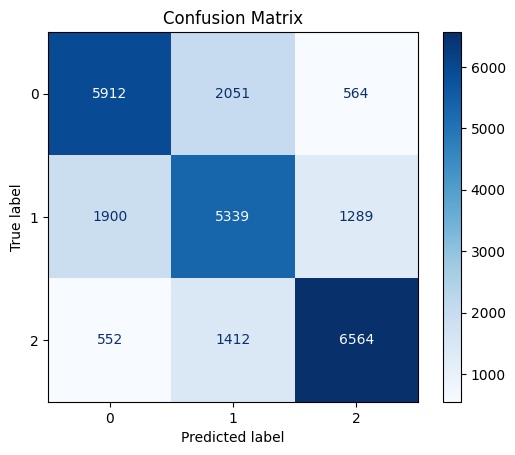

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()